Google changed the 'Next' button to infinite scrolling. I tried to bypass it but it didn't work. There are three things that needs to be done - it should find either the 'next', 'more results' or 'try again' button. Once it does, it needs to scroll and press whichever button it found and keep doing this till we reach the end of the page. Seems fairly simple and I tried writing if statements inside 'while True' but it didn't work. Google also began recognizing me as a bot despite time.sleep(). I will try to do this later. For now, I got lucky as the result page opened like the way it used to before and I was able to get the links and save them to a csv. 

In [25]:
import pandas as pd
import time
from playwright.async_api import async_playwright
playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)
page = await browser.new_page()

In [26]:
url = 'https://www.google.com/search?q=site%3Aboomlive.in&source=lnt&tbs=cdr%3A1%2Ccd_min%3A12%2F1%2F2019%2Ccd_max%3A3%2F31%2F2020&tbm=#ip=1'
await page.goto(url)


<Response url='https://www.google.com/search?q=site%3Aboomlive.in&source=lnt&tbs=cdr%3A1%2Ccd_min%3A12%2F1%2F2019%2Ccd_max%3A3%2F31%2F2020&tbm=' request=<Request url='https://www.google.com/search?q=site%3Aboomlive.in&source=lnt&tbs=cdr%3A1%2Ccd_min%3A12%2F1%2F2019%2Ccd_max%3A3%2F31%2F2020&tbm=' method='GET'>>

'<!DOCTYPE html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>site:boomlive.in - Google Search</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.PlpnwD4HYro.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo-D4573md5GmdJHX15d0lc3SoObhA/cb=gapi.loaded_0" nonce="" async=""></script><script nonce="">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:\'ZcyTY6vfAabi5NoPteOQiAQ\',kEXPI:\'31\',kBL:\'oABN\'};google.sn=\'web\';google.kHL=\'en\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("
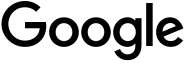

In [7]:
await page.content()

In [13]:
results = page.locator('.yuRUbf a')
results

<Locator frame=<Frame name= url='https://www.google.com/search?q=site%3Aboomlive.in&source=lnt&tbs=cdr%3A1%2Ccd_min%3A12%2F1%2F2019%2Ccd_max%3A3%2F31%2F2020&tbm=#ip=1'> selector='.yuRUbf a'>

In [14]:
count = await results.count()
count

10

In [15]:
for i in range(count):
    urls = results.nth(i)
    print(await urls.get_attribute('href'))

https://www.boomlive.in/membership
https://www.boomlive.in/budget
https://www.boomlive.in/register
https://www.boomlive.in/tags/bcov
https://www.boomlive.in/tag/banks/
https://www.boomlive.in/tags/times-magazine
https://www.boomlive.in/tags/news-graphic
https://www.boomlive.in/tags/dilawar-shaikh
https://www.boomlive.in/tags/chhota-rajan
https://www.boomlive.in/tags/elon-musk


In [9]:
# Click 'more results'

await page.locator(".RVQdVd").click()

In [36]:
#  while True:
# click either .RVQdVd or .GNJvt
#     first_button = page.locator(".RVQdVd, .GNJvt")    
#     if first_button:
#         await first_button.click()
#     else:
#         next_button = await page.query_selector("#pnnext")
#         if next_button:
#             await next_button.click()
#         else:
#             break


# I don't know why this is not working

TimeoutError: Timeout 30000ms exceeded.
=========================== logs ===========================
waiting for locator(".RVQdVd, .GNJvt")
============================================================

In [26]:
while True:
    try:
        results = page.locator('.yuRUbf a')
        time.sleep(1)
        count = await results.count()
        for i in range(count):
            links = results.nth(i)
            url = await links.get_attribute('href')
            if "webcache.google" not in url:
                print(url)
                

    # Click the 'Next' button
        async with page.expect_navigation():
            await page.locator("#pnnext").click(timeout=5000)
        print("Pressing the button")
        print("---------")
    except Exception as e:
        raise(e)
        # Exit the loop
        break

https://www.boomlive.in/membership
https://www.boomlive.in/budget
https://www.boomlive.in/register
https://www.boomlive.in/tags/bcov
https://www.boomlive.in/tag/banks/
https://www.boomlive.in/tags/times-magazine
https://www.boomlive.in/tags/news-graphic
https://www.boomlive.in/tags/dilawar-shaikh
https://www.boomlive.in/tags/chhota-rajan
https://www.boomlive.in/tags/elon-musk
Pressing the button
---------
https://bangla.boomlive.in/tags/puber-kolom
https://www.boomlive.in/tags/kathryn-robinson
https://www.boomlive.in/tags/jiangsu-province
https://www.boomlive.in/tags/Rohit-Vemula
https://www.boomlive.in/tags/Mufti-Raees
https://bangla.boomlive.in/tags/Gaiea-Sanskrit
https://www.boomlive.in/tags/High-School-list
https://www.boomlive.in/tag/factcheck/page-73
https://www.boomlive.in/tags/hotel-coronavirus-quarantine
https://www.boomlive.in/tags/Holi-in-india
Pressing the button
---------
https://bangla.boomlive.in/tags/news-18-india
https://www.boomlive.in/tags/japan-doctors-coronavirus
h

Pressing the button
---------
https://www.boomlive.in/fake-news/10-most-absurd-claims-fact-checked-in-2019-6440
https://www.boomlive.in/fake-news/coronavirus-indonesian-market-video-viral-as-wuhan-china-6697
https://hindi.boomlive.in/fake-news/delhi-riots-misinformation-surrounds-gunman-mohammed-shahrukhs-identity-7069
https://www.boomlive.in/world/coronavirus/can-bathing-in-hot-water-prevent-covid-19-7342
https://www.boomlive.in/health/did-dettol-know-about-coronavirus-outbreak-beforehand-a-factcheck-6767
https://www.boomlive.in/health/coronavirus-rumours-hit-mumbai-hotels-westin-and-fatty-bao-7246
https://www.boomlive.in/world/coronavirus/coronavirus-philippines-refutes-fake-advisory-on-visiting-malls-7200
https://www.boomlive.in/fake-news/coronavirus-viral-forward-promising-free-masks-is-fake-7250
https://www.boomlive.in/fake-news/no-delhi-violence-gunman-is-not-anurag-mishra-7025
https://www.boomlive.in/fake-news/nirbhaya-helpline-number-deactivated-in-2018-viral-message-false-6180

Pressing the button
---------
https://hindi.boomlive.in/fake-news/fake-quote-on-pulwama-attacks-attributed-to-comedian-kunal-kamra-7014
https://www.boomlive.in/world/coronavirus/no-refugees-in-malaysia-are-not-resisting-covid-19-testing-7309
https://bangla.boomlive.in/fake-news/jnu-violence-unrelated-photos-of-sex-toys-condoms-go-viral-6488
https://www.boomlive.in/fake-news/fake-quote-on-pulwama-attacks-attributed-to-comedian-kunal-kamra-6981
https://www.boomlive.in/fake-news/pakistani-twitter-handles-peddle-madhya-pradesh-lynching-video-as-delhi-7064
https://www.boomlive.in/fast-check/did-italian-president-surrender-to-coronavirus-outbreak-fake-quote-viral-7391
https://www.boomlive.in/fake-news/poster-claiming-fix-rate-for-shaheen-bagh-protesters-is-morphed-6604
https://hindi.boomlive.in/fake-news/muslim-politician-disguised-as-a-hindu-in-anti-caa-protests-6356
https://www.boomlive.in/world/coronavirus/false-salt-or-vinegar-warm-water-gargle-eliminates-the-coronavirus-7329
https://www

Pressing the button
---------
https://www.boomlive.in/health/viral-posts-claiming-vaccines-for-coronavirus-have-been-developed-are-false-7201
https://www.boomlive.in/fake-news/did-lawyers-in-pakistan-assault-a-hindu-woman-a-factcheck-6277
https://www.boomlive.in/fake-news/hyderabad-vet-rape-inactive-numbers-shared-as-emergency-helpline-for-women-6221
https://www.boomlive.in/fake-news/tata-trusts-rubbishes-fake-quote-attributed-to-ratan-tata-about-jnu-6958
https://www.boomlive.in/fake-news/morphed-screenshots-of-aaj-tak-make-false-claims-about-coronavirus-cure-7194
https://www.boomlive.in/world/edited-image-of-mercury-venus-and-saturn-over-pyramids-of-giza-viral-7077
https://www.boomlive.in/fake-news/viral-photo-claiming-congress-worker-held-muslim-rashtra-poster-is-fake-6382
https://www.boomlive.in/health/can-avoiding-ice-creams-and-cold-drinks-for-90-days-prevent-coronavirus-6689
https://www.boomlive.in/fake-news/croatia-earthquake-pics-peddled-as-italy-overwhelmed-with-covid-19-patie

TimeoutError: Timeout 30000.0ms exceeded.
=========================== logs ===========================
waiting for navigation until 'load'
============================================================

In [19]:
boom = []
while True:
    try:
        results = page.locator('.yuRUbf a')
        time.sleep(1)
        count = await results.count()
        for i in range(count):
            links = results.nth(i)
            url = await links.get_attribute('href')
            if "webcache.google" not in url:
                boom.append(url)
                

    # Click the 'Next' button
        async with page.expect_navigation():
            await page.locator("#pnnext").click(timeout=5000)
        print("Pressing the button")
        print("---------")
    except Exception as e:
        raise(e)
        # Exit the loop
        break

Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------


TimeoutError: Timeout 30000.0ms exceeded.
=========================== logs ===========================
waiting for navigation until 'load'
============================================================

In [20]:
boom

['https://bangla.boomlive.in/tags/puber-kolom',
 'https://www.boomlive.in/tags/kathryn-robinson',
 'https://www.boomlive.in/tags/jiangsu-province',
 'https://www.boomlive.in/tags/Rohit-Vemula',
 'https://www.boomlive.in/tags/Mufti-Raees',
 'https://bangla.boomlive.in/tags/Gaiea-Sanskrit',
 'https://www.boomlive.in/tags/High-School-list',
 'https://www.boomlive.in/tag/factcheck/page-73',
 'https://www.boomlive.in/tags/hotel-coronavirus-quarantine',
 'https://www.boomlive.in/tags/Holi-in-india',
 'https://bangla.boomlive.in/tags/news-18-india',
 'https://www.boomlive.in/tags/japan-doctors-coronavirus',
 'https://www.boomlive.in/tags/Delhi-Police-Shahdara',
 'https://hindi.boomlive.in/fake-news/--6620',
 'https://www.boomlive.in/tags/justice-s-muralidhar',
 'https://www.boomlive.in/tags/Al-Ekhbariya-TV',
 'https://www.boomlive.in/tags/break-your-own-news',
 'https://www.boomlive.in/tags/University-of-Queensland-vaccine-Coronavirus',
 'https://www.boomlive.in/coronavirus:-82-people-from-mu

In [22]:
df = pd.DataFrame({'url': boom})
df.head()

,url
0,https://bangla.boomlive.in/tags/puber-kolom
1,https://www.boomlive.in/tags/kathryn-robinson
2,https://www.boomlive.in/tags/jiangsu-province
3,https://www.boomlive.in/tags/Rohit-Vemula
4,https://www.boomlive.in/tags/Mufti-Raees


In [23]:
df.shape

(289, 1)

In [24]:
df.to_csv("boom_links.csv", index=False)